In [15]:
import keras

In [16]:
from keras.datasets.mnist import load_data
# ((訓練題目，訓練答案)，(測試題目，測試答案))
((x_train, y_train), (x_test, y_test)) = load_data()

In [17]:
# 看訓練資料和測試資料有幾筆
print(x_train.shape) # 看大小
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


7


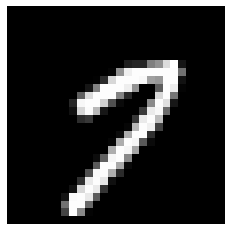

In [18]:
import matplotlib.pyplot as plt
import random
c = random.randint(0, x_train.shape[0] - 1)
print(y_train[c]) # 打印答案
plt.axis("off") # 去掉軸刻度
plt.imshow(x_train[c], cmap="gray")

In [19]:
import pandas as pd 
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,127,146,220,255,21,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,253,253,253,253,113,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,160,152,253,253,18,0,0,0,0,0


In [21]:
# 資料預處理
# 1. 題目預處理(Normalize)
# keras在準備隨機那組 weights，跟Normalize的圖片比較匹配
#  1. 第一種方式: 0 ~ 1，第二種方式: -1 ~ 1
# 2. MLP 規定一定要攤開成為1D
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
# 答案預處理(One-hot encoding)原本是5 要轉換成 答案標註
# 希望的樣子:[P0,P1,...,P9]
# 5: [0,0,0,0,1,0,0,0,0,0]
# 可能輸出:[0,0,0.2,0,0.8,0,0,0,0,0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原來:",y_train[0])
print("Cat後:",y_train_cat[0])

原來: 5
Cat後: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [35]:
# 建立模型
# 第一種模型: 蛋糕支架(Sequential),堆上一層(Layers)
# Layers: Dense(全連接層)
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層: input_dim->告訴他輸入有幾個
mlp.add(Dense(128, activation="relu", input_dim=784))
# Param = 需要調整的參數(1個activation(激活)配上1個bias(偏差)) 所以是 784 * 128(神經元的連結) + 128個激活(偏差) = 100480
mlp.add(Dense(10, activation="softmax"))
# Param = 需要調整的參數(1個activation(激活)配上1個bias(偏差)) 所以是 128 * 10(神經元的連結) + 10個激活(偏差) = 1290
mlp.summary()
# Output Shape = 神經元數 


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 確定模型訓練方式...等
# 隨機(隨便選擇一組weights)梯度(正確的方向)下降
# loss: 最後輸出一個選擇binary_crossentropy，最後輸出多個選擇categorical_crossentropy(機率亂度距離)，計算題選用mse或mae
# Optimizer: 下降的時候如何優化->基於動量(我在走的時候不是等速度，而有速度累積)
mlp.compile(loss="categorical_crossentropy", # 評量差距標準
           metrics=["accuracy"], # 正確機率
           optimizer="adam")

In [42]:
# batch: 看幾筆(200)做一次梯度下降(修正)
# epochs: 整份考古題看幾次(10)
# 10個epoch, 200batch: 60000 * 10 / 200 = 3000
mlp.fit(x_train_shape,
        y_train_cat,
        batch_size=200,
        epochs=15,
        validation_split=0.1,#拿1/10資料來驗證
        verbose=2)# 去掉進度條
# 最主要看 val_loss 只要到平滑起來就差不多到底了

Epoch 1/5
270/270 - 1s - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.0781 - val_accuracy: 0.9798 - 732ms/epoch - 3ms/step
Epoch 2/5
270/270 - 1s - loss: 0.0089 - accuracy: 0.9988 - val_loss: 0.0807 - val_accuracy: 0.9802 - 676ms/epoch - 3ms/step
Epoch 3/5
270/270 - 1s - loss: 0.0077 - accuracy: 0.9991 - val_loss: 0.0833 - val_accuracy: 0.9792 - 697ms/epoch - 3ms/step
Epoch 4/5
270/270 - 1s - loss: 0.0067 - accuracy: 0.9993 - val_loss: 0.0819 - val_accuracy: 0.9788 - 645ms/epoch - 2ms/step
Epoch 5/5
270/270 - 1s - loss: 0.0057 - accuracy: 0.9995 - val_loss: 0.0917 - val_accuracy: 0.9777 - 743ms/epoch - 3ms/step


In [49]:
# 訓練完與正確答案做比較
mlp.evaluate(x_test_shape,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0843 - accuracy: 0.9774


[0.08431998640298843, 0.977400004863739]

In [53]:
import numpy as np
# 輸出機率
mlp.predict(x_test_shape)
# 輸出分類
# mlp.predict_step(x_test_shape) # tensorflow2.5後不再使用
predict_x = mlp.predict(x_test_shape) # 輸出機率 
classes_x = np.argmax(predict_x,axis=1) # 輸出分類
classes_x
from sklearn.metrics import confusion_matrix # 混淆矩陣
pd.DataFrame(confusion_matrix(y_test, classes_x)) # 參數1分類,參數2預測結果


313/313 [==============================] - 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9
0,969,0,0,1,1,2,3,2,2,0
1,0,1128,2,2,0,1,1,0,1,0
2,3,1,1013,2,2,0,2,7,2,0
3,0,0,5,995,0,3,0,4,1,2
4,1,0,1,0,969,0,1,1,0,9
5,3,1,0,18,1,861,3,0,2,3
6,3,3,1,1,3,6,939,0,2,0
7,0,2,10,4,0,0,0,1008,2,2
8,7,1,10,18,4,7,2,6,915,4
9,3,4,0,7,7,2,0,8,1,977


61
115
247
321
340
445
495
582
583
659
684
691
707
720
839
844
877
882
900
947
951
956
1003
1014
1039
1112
1128
1156
1181
1182
1226
1232
1242
1247
1272
1319
1393
1441
1500
1530
1553
1609
1621
1681
1709
1717
1754
1828
1850
1878
1901
1941
1982
1984
2004
2016
2035
2053
2098
2109
2118
2135
2189
2272
2293
2298
2387
2393
2395
2406
2414
2488
2526
2597
2598
2607
2635
2648
2654
2810
2850
2896
2915
2921
2927
2939
2995
3030
3060
3073
3117
3289
3405
3406
3422
3451
3490
3503
3520
3549
3558
3567
3574
3597
3662
3674
3681
3718
3727
3751
3757
3811
3818
3838
3853
3869
3871
3902
3906
3926
3943
4065
4075
4078
4123
4140
4152
4163
4176
4199
4207
4224
4248
4255
4289
4294
4300
4360
4425
4433
4497
4534
4536
4731
4740
4807
4823
4879
4880
4890
4956
4978
5331
5457
5495
5642
5734
5749
5757
5936
5937
5972
5973
5981
5982
6004
6023
6028
6059
6166
6390
6400
6532
6555
6560
6571
6574
6597
6598
6625
6651
6755
6847
7208
7216
7472
7481
7514
7545
7800
7823
7886
7921
8062
8183
8246
8294
8311
8325
8456
8519
8520
8522
9009
901

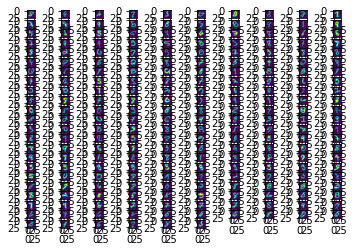

In [59]:
# numpy類型才能直接做每個數字比較
import numpy as np
tuplnp = np.nonzero(classes_x != y_test) # 找出非0索引
for i in tuplnp[0]: # 取出第一個tuple
    print(i)
# list: list[一個數字]
# numpy array: nparray[[多個數字]]

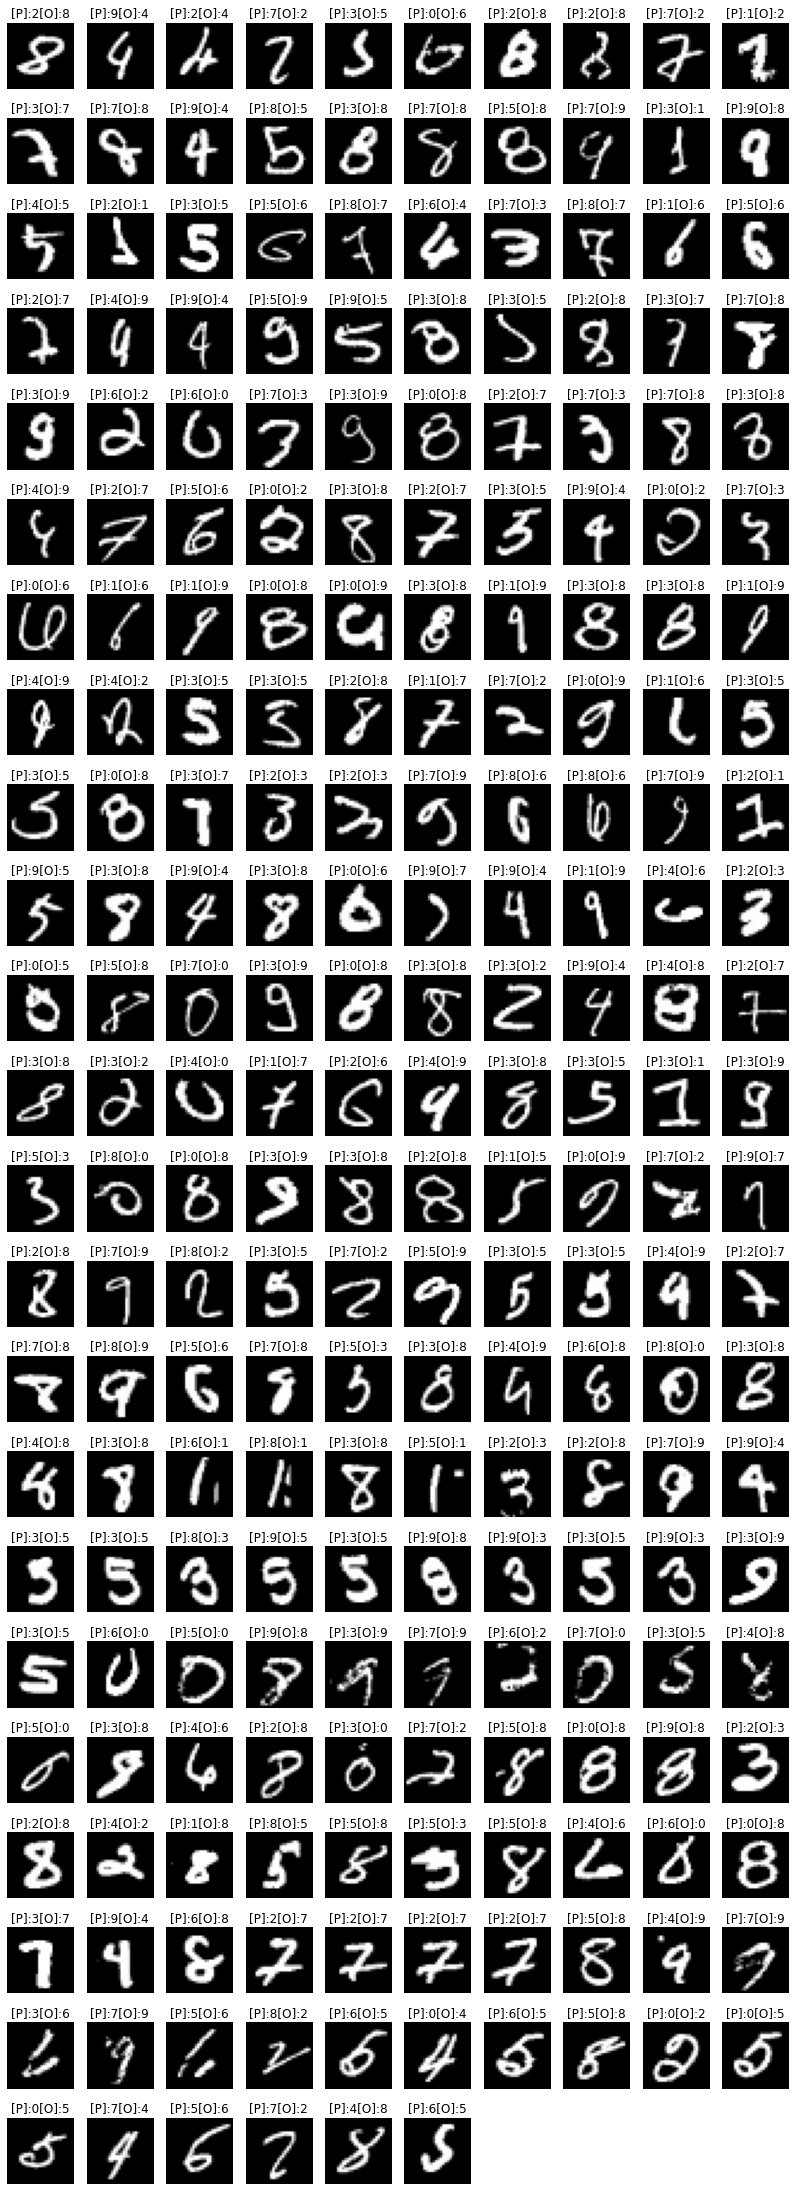

In [65]:
diff = tuplnp[0]
# 預測錯誤的圖的原本標籤
orifalse = y_test[diff]
# 預測錯誤的圖的預測標籤
prefalse = classes_x[diff]
# 把圖拿出來
imgfalse = x_test[diff]
plt.figure(figsize=(14,40)) # 調整整張圖的寬高         
width = 10 # 每一個列 固定10個
height = int(len(imgfalse) / 10) + 1
for (i, img) in enumerate(imgfalse):
    # (列數， 行數， 第幾張圖(i開始))
    plt.subplot(height,width,i + 1)
    plt.axis("off") # 去掉坐標軸
    t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
    plt.title(t)
    plt.imshow(img,cmap="gray")